## Project Machine Learning
### By Ajay Kumar

### Problem Statement

Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

## Importing the Libraries

In [ ]:
#Import all necessary modules
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


## Loading the Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/AIML PROJECT/SUPERVISED MACHINE LEARNING/Election_Data.xlsx',usecols='B:J')

In [ ]:
print(df.shape)
df.head()

(1525, 9)


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


## 1.1 Read the dataset. Do the descriptive statistics and do the null value ancondition check. Write an inference on it.

In [ ]:
# Descriptive statistics
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


The Dataset is not narmalised i.e mean and standard deviation of each atributes are not in same scale.

Age: Minimun age is 24 and max is 93

Exept age all the atributes are categorical in nature of different classes

In [ ]:
# Null check
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

The dataset has no null values and duplicates are droped

## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

In [ ]:
# Univariate Analysis
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

In [ ]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [ ]:
col = ['age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge']

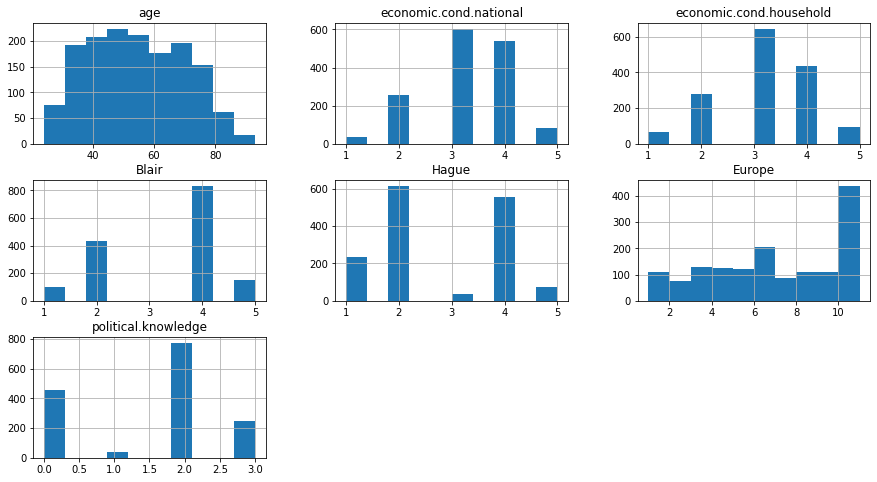

In [ ]:
df[col].hist();

Age: The atribute is slightly right skewed 

All the atributes exept Age is categorical in nature

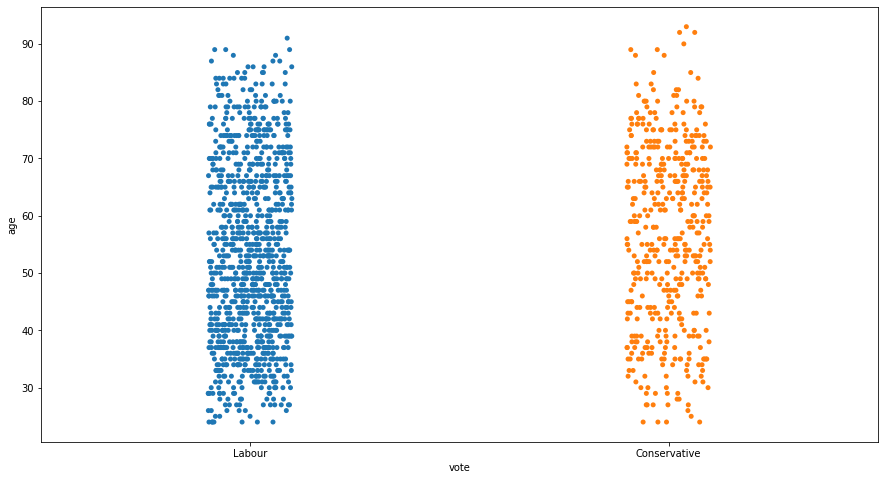

In [ ]:
# Bivariiate Analysis
sns.stripplot(x = 'vote', y= 'age', data=df, jitter=True);

The abovve plot says people at lower and higher age are not very less in no. to vote consevative party where as majority of people from all the ages are giving votes to labour party  

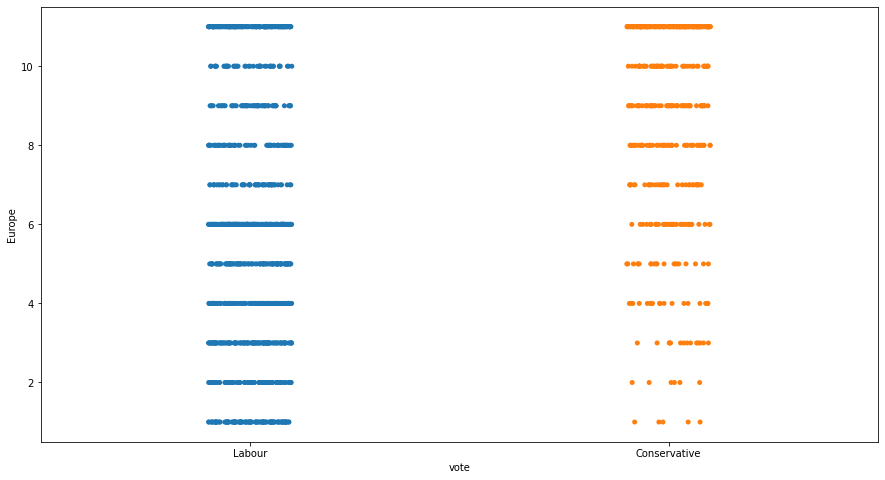

In [ ]:
# Bivariiate Analysis
sns.stripplot(x = 'vote', y= 'Europe', data=df, jitter=True);

In variable Europe people at lower category i.e from 1-4 are not votting for conservative party

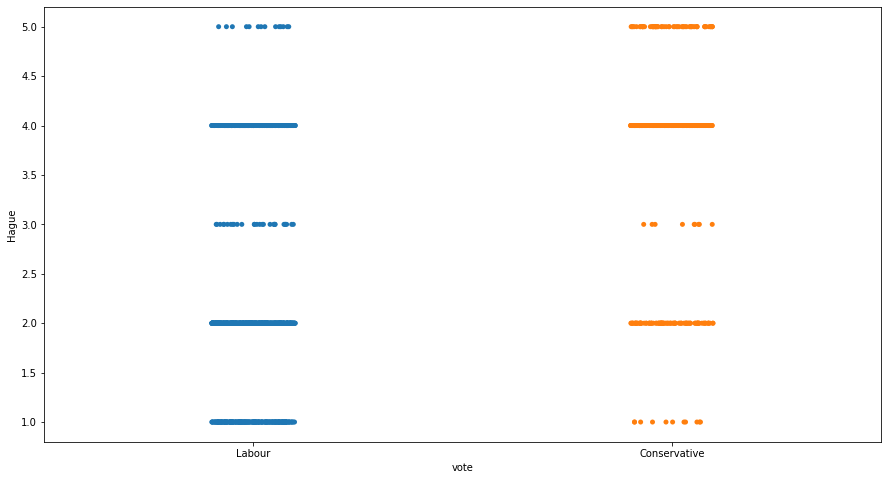

In [ ]:
# Bivariiate Analysis
sns.stripplot(x = 'vote', y= 'Hague', data=df, jitter=True);

In variable Hague people at 1 and 3 are very less in no for voting to conservative party

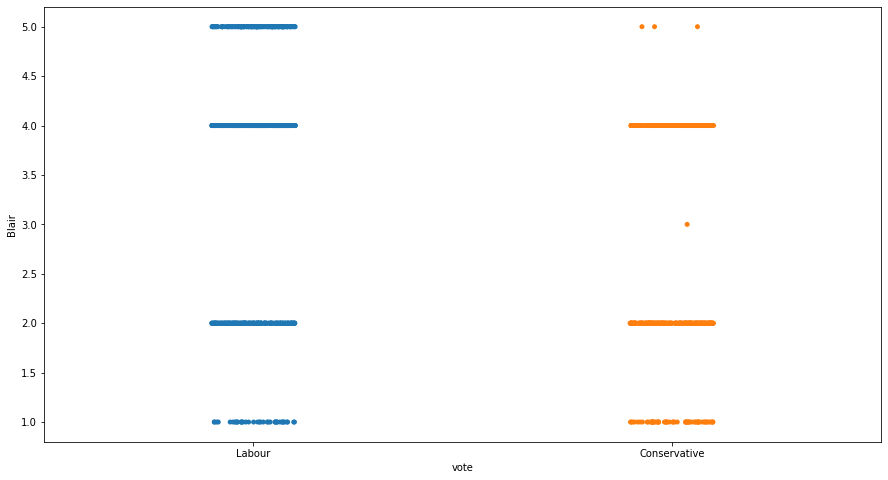

In [ ]:
# Bivariiate Analysis
sns.stripplot(x = 'vote', y= 'Blair', data=df, jitter=True);

In variable Blair people at 3 and 5 are very less in no for voting to conservative party and pepole at level 3 are not voting for Labour party

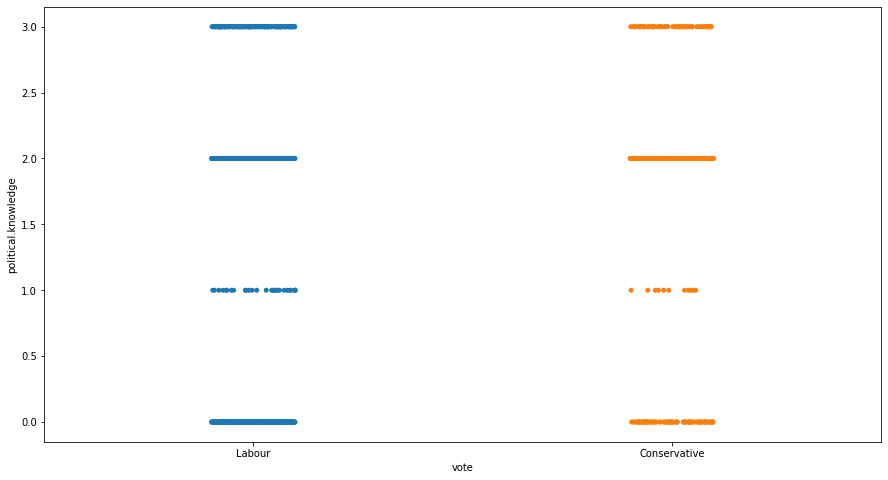

In [ ]:
# Bivariiate Analysis
sns.stripplot(x = 'vote', y= 'political.knowledge', data=df, jitter=True);

The variable is not a good predictor for above class

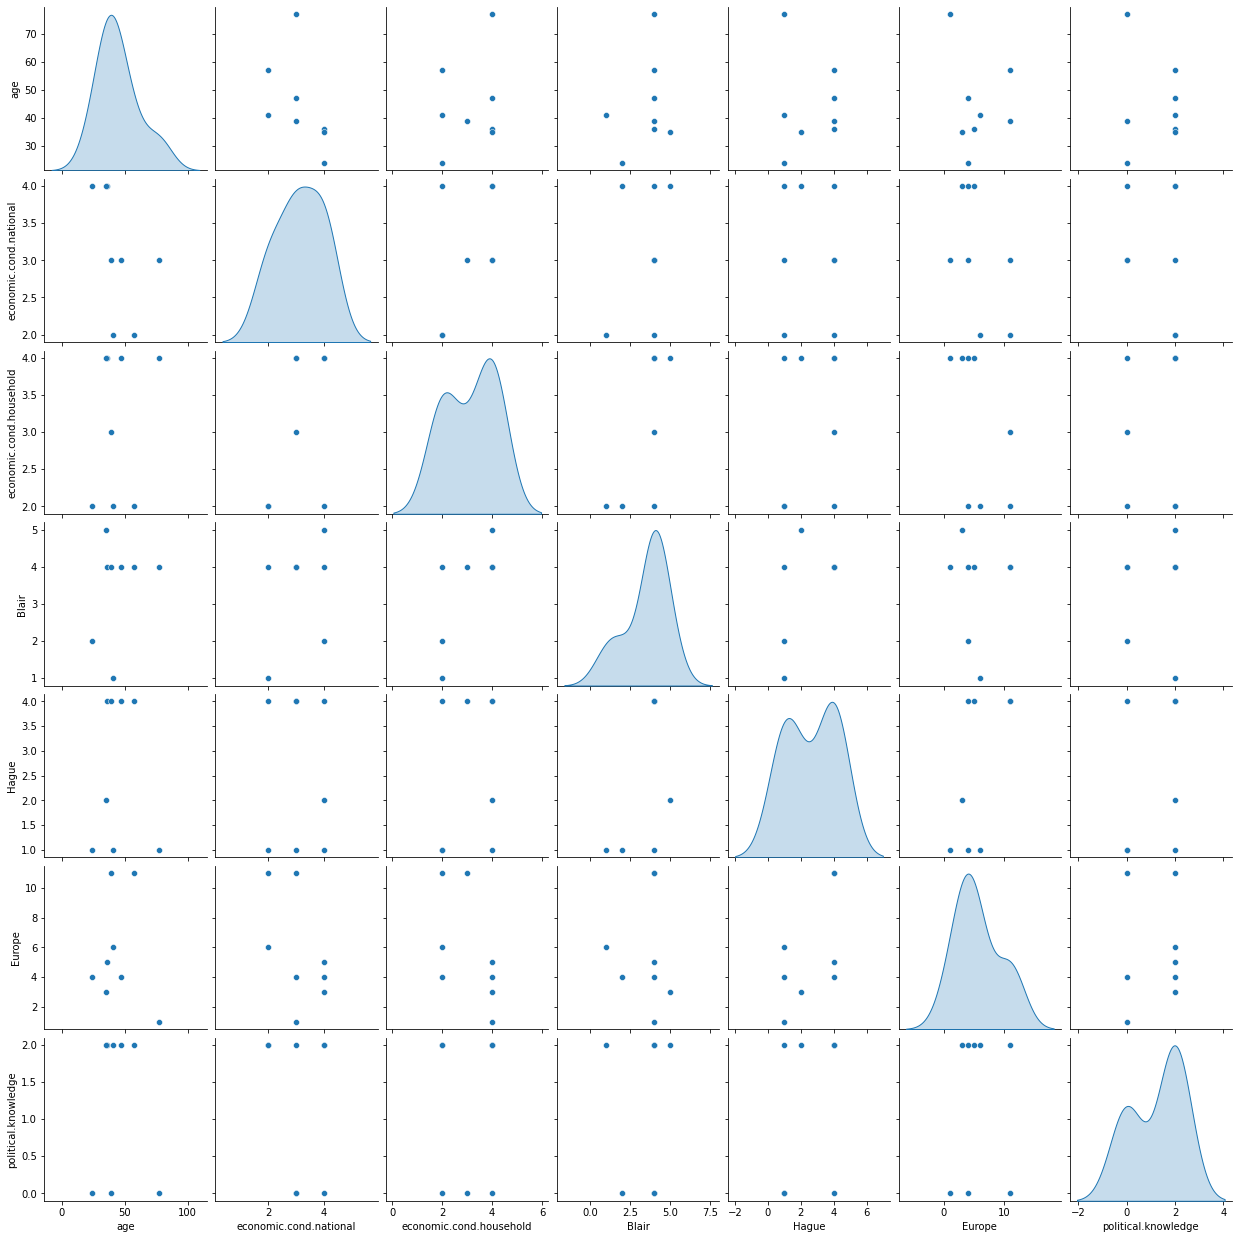

In [ ]:
# Multivariate Analysis
sns.pairplot(df.iloc[1:9], diag_kind='kde');

As most of the atributes are categorical in nature so the pairplot indicates there is no multi colinearity in the dataset

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)

In [ ]:
# Encode the data (having string values) for Modelling
df['gender'] = df['gender'].replace({'female':0, 'male':1})

In [ ]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1


Scalling is necessary here to normallise the datset because variabe age is in diffrent scale and other variables are in different scale

In [ ]:
# Creating Input and Traget variable
X = df.drop('vote', axis=1)
y = df.pop('vote')

In [ ]:
from scipy.stats import zscore
X = X.apply(zscore)
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,-0.278185,-0.148020,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.856242,0.926367,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.856242,0.926367,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.856242,-1.222408,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.412613,-1.222408,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [ ]:
# Checking class of the target variable
y.value_counts(normalize=True)

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64

The class of the target variable is not balanced i.e 70% entries for Laonur and 30% is for Conservative

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score = lr.score(X_test, y_test).round(3)
print(lr_train_score)
print(lr_test_score)
ytrain_predict = lr.predict(X_train)
ytest_predict = lr.predict(X_test)

0.828
0.855


Testing score: 0.855


              precision    recall  f1-score   support

Conservative       0.81      0.68      0.74       138
      Labour       0.87      0.93      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.86      0.85       456



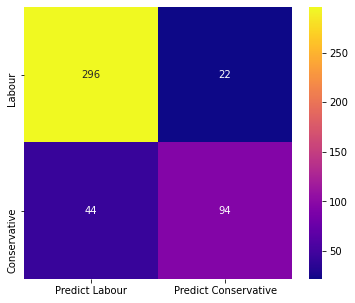

In [ ]:
 ## Performance Matrix on test   data set
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
print('Testing score:',lr_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

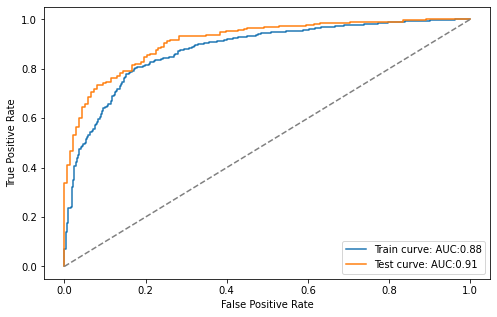

In [ ]:
train_predict_prob = lr.predict_proba(X_train)
test_predict_prob = lr.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(lr, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(lr,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## linear discriminant analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train, y_train)

In [ ]:
lda_train_score = lda_model.score(X_train, y_train).round(3)
lda_test_score = lda_model.score(X_test, y_test).round(3)
print(lda_train_score)
print(lda_test_score)

0.823
0.853


In [ ]:
ytrain_predict = lda_model.predict(X_train)
ytest_predict = lda_model.predict(X_test)

Training score: 0.823


              precision    recall  f1-score   support

Conservative       0.72      0.67      0.70       322
      Labour       0.86      0.89      0.87       739

    accuracy                           0.82      1061
   macro avg       0.79      0.78      0.79      1061
weighted avg       0.82      0.82      0.82      1061



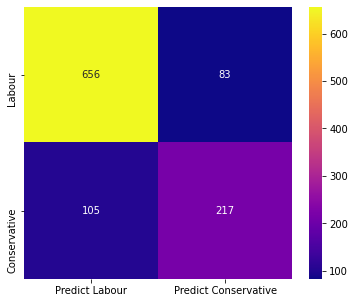

In [ ]:
 ## Performance Matrix on train data set
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print('Training score:',lda_train_score)
cm = metrics.confusion_matrix(y_train, ytrain_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_train, ytrain_predict))

Testing score: 0.853


              precision    recall  f1-score   support

Conservative       0.80      0.69      0.74       138
      Labour       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



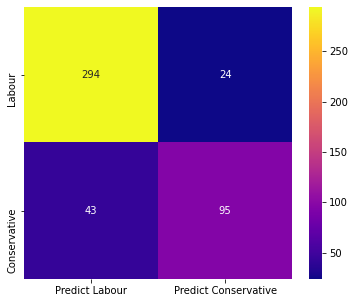

In [ ]:
 ## Performance Matrix on test   data set
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
print('Testing score:',lda_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

True Positives (TP): we correctly predicted for Conservative 95

True Negatives (TN): we correctly predicted for Laour 294

False Positives (FP): we incorrectly predicted for Conservative (a "Type I error") 43 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Labour (a "Type II error") 24 Falsely predict negative Type II error

In [ ]:
train_predict_prob = lda_model.predict_proba(X_train)
test_predict_prob = lda_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

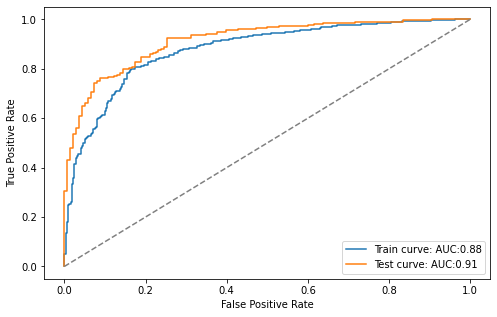

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(lda_model, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(lda_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results

### KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

In [ ]:
knn_test_score = knn_model.score(X_test, y_test).round(3)

In [ ]:
ytrain_predict = knn_model.predict(X_train)
ytest_predict = knn_model.predict(X_test)

Testing score: 0.842


              precision    recall  f1-score   support

Conservative       0.75      0.72      0.74       138
      Labour       0.88      0.89      0.89       318

    accuracy                           0.84       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



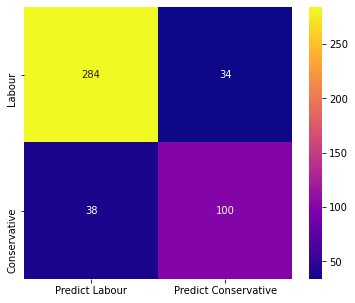

In [ ]:
 ## Performance Matrix on test   data set
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
print('Testing score:',knn_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

True Positives (TP): we correctly predicted for Conservative 100

True Negatives (TN): we correctly predicted for Laour 284

False Positives (FP): we incorrectly predicted for Conservative (a "Type I error") 38 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Labour (a "Type II error") 34 Falsely predict negative Type II error

In [ ]:
train_predict_prob = knn_model.predict_proba(X_train)
test_predict_prob = knn_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

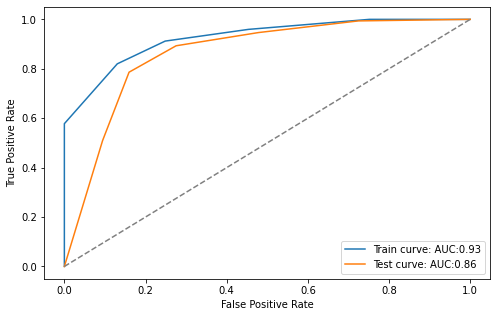

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(knn_model, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(knn_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Naïve Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
NB_test_score = NB_model.score(X_test, y_test).round(3)

In [ ]:
ytrain_predict = NB_model.predict(X_train)
ytest_predict = NB_model.predict(X_test)

Testing score: 0.857


              precision    recall  f1-score   support

Conservative       0.79      0.72      0.75       138
      Labour       0.88      0.92      0.90       318

    accuracy                           0.86       456
   macro avg       0.84      0.82      0.83       456
weighted avg       0.86      0.86      0.86       456



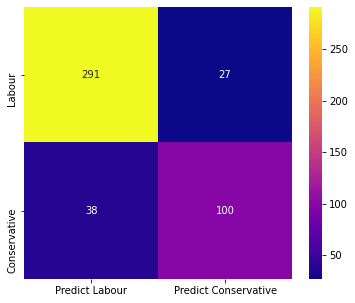

In [ ]:
 ## Performance Matrix on test   data set
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, plot_roc_curve
print('Testing score:',NB_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

True Positives (TP): we correctly predicted for Conservative 100

True Negatives (TN): we correctly predicted for Laour 291

False Positives (FP): we incorrectly predicted for Conservative (a "Type I error") 38 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Labour (a "Type II error") 27 Falsely predict negative Type II error

In [ ]:
train_predict_prob = NB_model.predict_proba(X_train)
test_predict_prob = NB_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

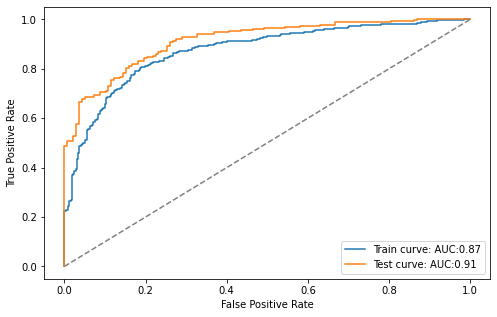

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(NB_model, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(NB_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.

### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini')
Bagg_model = BaggingClassifier(random_state=1,base_estimator=rf, n_estimators=50, bootstrap=True)
Bagg_model = Bagg_model.fit(X_train, y_train)

In [ ]:
ytrain_predict = Bagg_model.predict(X_train)
ytest_predict = Bagg_model.predict(X_test)
Bagg_train_score = Bagg_model.score(X_train, y_train).round(3)
Bagg_test_score = Bagg_model.score(X_test, y_test).round(3)
print(Bagg_train_score)
print(Bagg_test_score)

0.965
0.853


Training score: 0.965


              precision    recall  f1-score   support

Conservative       0.96      0.93      0.94       322
      Labour       0.97      0.98      0.98       739

    accuracy                           0.97      1061
   macro avg       0.96      0.95      0.96      1061
weighted avg       0.97      0.97      0.96      1061



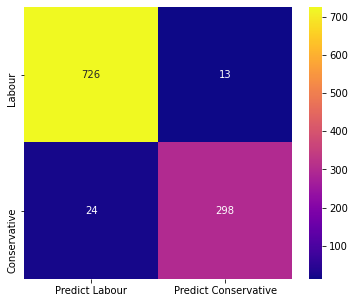

In [ ]:
 ## Performance Matrix on train data set
print('Training score:',Bagg_train_score)
cm = metrics.confusion_matrix(y_train, ytrain_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_train, ytrain_predict))

Training score: 0.853


              precision    recall  f1-score   support

Conservative       0.80      0.69      0.74       138
      Labour       0.87      0.92      0.90       318

    accuracy                           0.85       456
   macro avg       0.84      0.81      0.82       456
weighted avg       0.85      0.85      0.85       456



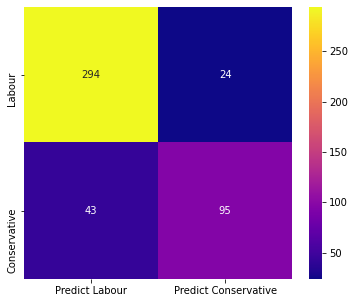

In [ ]:
 ## Performance Matrix on train data set
print('Training score:',Bagg_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

True Positives (TP): we correctly predicted for Conservative 95

True Negatives (TN): we correctly predicted for Laour 294

False Positives (FP): we incorrectly predicted for Conservative (a "Type I error") 43 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Labour (a "Type II error") 24 Falsely predict negative Type II error

**The Bagging model is giving 96% accuracy on testing data and 85% on testing data**

**The Precision and recall for predicting both the class is also good**

In [ ]:
# ROC and AUC
train_predict_prob = Bagg_model.predict_proba(X_train)
test_predict_prob = Bagg_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

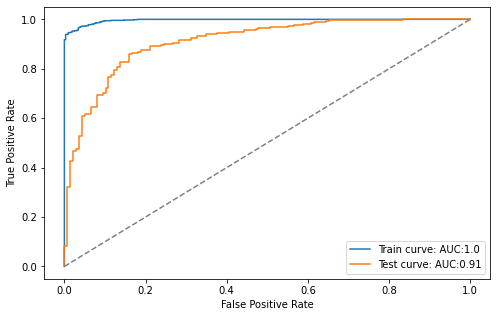

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(Bagg_model, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(Bagg_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Ada Boost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=50, random_state=1, learning_rate=0.05)
ADB_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.05,
                   n_estimators=50, random_state=1)

In [ ]:
ytrain_predict = ADB_model.predict(X_train)
ytest_predict = ADB_model.predict(X_test)
ADB_train_score = ADB_model.score(X_train, y_train).round(3)
ADB_test_score = ADB_model.score(X_test, y_test).round(3)
print(ADB_train_score)
print(ADB_test_score)

0.782
0.807


Testing score: 0.807


              precision    recall  f1-score   support

Conservative       0.85      0.44      0.58       138
      Labour       0.80      0.97      0.87       318

    accuracy                           0.81       456
   macro avg       0.82      0.70      0.73       456
weighted avg       0.81      0.81      0.79       456



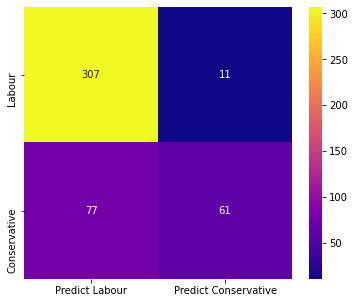

In [ ]:
## Performance Matrix on test data set
print('Testing score:',ADB_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

True Positives (TP): we correctly predicted for Conservative 61

True Negatives (TN): we correctly predicted for Laour 307

False Positives (FP): we incorrectly predicted for Conservative (a "Type I error") 11 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted for Labour (a "Type II error") 77 Falsely predict negative Type II error

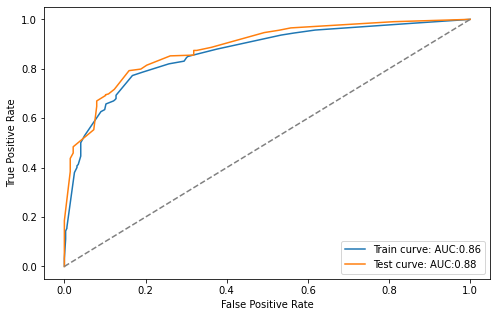

In [ ]:
# ROC and AUC
train_predict_prob = ADB_model.predict_proba(X_train)
test_predict_prob = ADB_model.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(ADB_model, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(ADB_model,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=5,warm_start=True, )
gbcl.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [ ]:
ytrain_predict = gbcl.predict(X_train)
ytest_predict = gbcl.predict(X_test)
gbcl_train_score = gbcl.score(X_train, y_train).round(3)
gbcl_test_score = gbcl.score(X_test, y_test).round(3)
print(gbcl_train_score)
print(gbcl_test_score)

0.919
0.836


Testing score: 0.836


              precision    recall  f1-score   support

Conservative       0.75      0.68      0.71       138
      Labour       0.87      0.90      0.88       318

    accuracy                           0.84       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.83      0.84      0.83       456



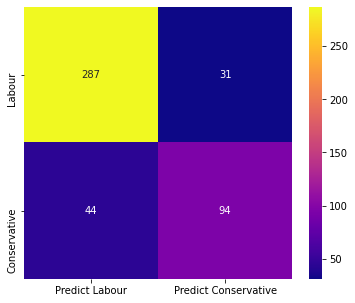

In [ ]:
## Performance Matrix on test data set
print('Testing score:',gbcl_test_score)
cm = metrics.confusion_matrix(y_test, ytest_predict, labels=['Labour','Conservative'])
df_cm = pd.DataFrame(cm, columns=[i for i in ['Predict Labour', 'Predict Conservative']], index=[i for i in ['Labour','Conservative']])
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='plasma');
print('\n')
print(classification_report(y_test, ytest_predict))

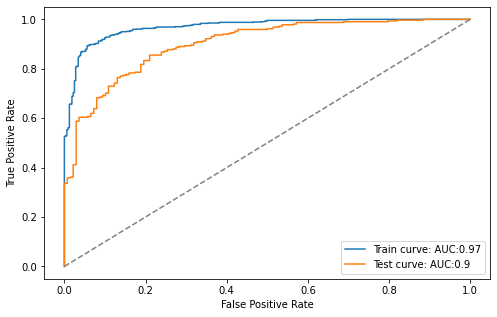

In [ ]:
# ROC and AUC
train_predict_prob = gbcl.predict_proba(X_train)
test_predict_prob = gbcl.predict_proba(X_test)
AUC_train = roc_auc_score(y_train, train_predict_prob[:,1])
AUC_test = roc_auc_score(y_test, test_predict_prob[:,1])

fig, ax = plt.subplots(figsize=(8,5))
plot_roc_curve(gbcl, X_train, y_train, ax =ax, label = 'Train curve: AUC:' + str(round(AUC_train,2)));
plot_roc_curve(gbcl,X_test, y_test, ax =ax, label= 'Test curve: AUC:'+ str(round(AUC_test,2)));
plt.plot([0,1],[0,1], linestyle = '--', color= 'grey');

## Problem 2:

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

President John F. Kennedy in 1961

President Richard Nixon in 1973

## Loading the Dataset

In [ ]:
 
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kenedy = inaugural.raw('1961-Kennedy.txt')
nixon = inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


## 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Total no of charachers in roosevelt
characters = 0
for i in roosevelt:
  characters = characters+1
print('Total no of Characters:', characters)



Total no of Characters: 7571


In [ ]:
# Total no of charachers in kenedy
characters = 0
for i in kenedy:
  characters = characters+1
print('Total no of Characters:', characters)



Total no of Characters: 7618


In [ ]:
# Total no of charachers in nixon
characters = 0
for i in nixon:
  characters = characters+1
print('Total no of Characters:', characters)



Total no of Characters: 9991


In [ ]:
# Total no of words in roosevelt
words = roosevelt.split()
words[0:5]

['On', 'each', 'national', 'day', 'of']

In [ ]:
len(words)

1360

In [ ]:
# Total no of sentences
sentences = roosevelt.split(sep= '\n')
sentences[0:5]

['On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.',
 '',
 "In Washington's day the task of the people was to create and weld together a nation.",
 '',
 "In Lincoln's day the task of the people was to preserve that Nation from disruption from within."]

In [ ]:
len(sentences)

76

In [ ]:
# Total no of words in kenedy
words = kenedy.split()
words[0:5]

['Vice', 'President', 'Johnson,', 'Mr.', 'Speaker,']

In [ ]:
len(words)

1390

In [ ]:
# Total no of sentences in kenedy
sentences = kenedy.split(sep= '\n')
sentences[0:5]

['Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.',
 '',
 'The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.',
 '',
 'We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed t

In [ ]:
len(sentences)

54

In [ ]:
# Total no of words in nixon
words = nixon.split()
words[0:5]

['Mr.', 'Vice', 'President,', 'Mr.', 'Speaker,']

In [ ]:
len(words)

1819

In [ ]:
# Total no of sentences in kenedy
sentences = nixon.split(sep= '\n')
sentences[0:5]

['Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:',
 '',
 'When we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.',
 '',
 'As we meet here today, we stand on the threshold of a new era of peace in the world.']

In [ ]:
len(sentences)

102

## 2.2 Remove all the stopwords from all three speeches

# Roosvelt Speech

In [ ]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

review = re.sub('[^a-zA-Z]', ' ', roosevelt)
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

corpus.append(review)

In [ ]:
corpus[0][0:5]

['nation', 'day', 'inaugur', 'sinc', 'peopl']

In [ ]:
from collections import Counter
my_counter = Counter()
for word in corpus:
    my_counter.update(word)

In [ ]:
# Most common three words used in speech of Roosvelt
my_counter.most_common(3)

[('nation', 17), ('know', 10), ('peopl', 9)]

In [ ]:
review = ' '.join(review)
review

'nation day inaugur sinc peopl renew sens dedic unit state washington day task peopl creat weld togeth nation lincoln day task peopl preserv nation disrupt within day task peopl save nation institut disrupt without us come time midst swift happen paus moment take stock recal place histori rediscov may risk real peril inact live nation determin count year lifetim human spirit life man three score year ten littl littl less life nation full measur live men doubt men believ democraci form govern frame life limit measur kind mystic artifici fate unexplain reason tyranni slaveri becom surg wave futur freedom eb tide american know true eight year ago life republ seem frozen fatalist terror prove true midst shock act act quickli boldli decis later year live year fruit year peopl democraci brought us greater secur hope better understand life ideal measur materi thing vital present futur experi democraci success surviv crisi home put away mani evil thing built new structur endur line maintain fa

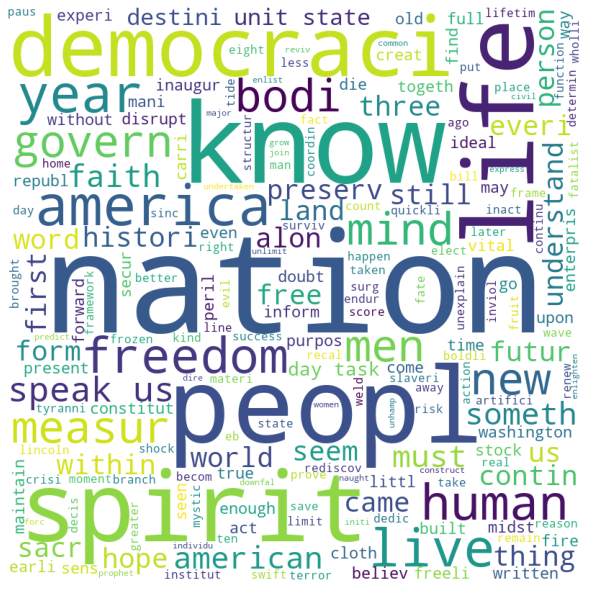

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Kenedy speech

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

review = re.sub('[^a-zA-Z]', ' ', kenedy)
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

corpus.append(review)

In [ ]:
from collections import Counter
my_counter = Counter()
for word in corpus:
    my_counter.update(word)
my_counter.most_common(3)

[('let', 16), ('us', 12), ('power', 9)]

In [ ]:
review = ' '.join(review)
review

'vice presid johnson mr speaker mr chief justic presid eisenhow vice presid nixon presid truman reverend clergi fellow citizen observ today victori parti celebr freedom symbol end well begin signifi renew well chang sworn almighti god solemn oath forebear l prescrib nearli centuri three quarter ago world differ man hold mortal hand power abolish form human poverti form human life yet revolutionari belief forebear fought still issu around globe belief right man come generos state hand god dare forget today heir first revolut let word go forth time place friend foe alik torch pass new gener american born centuri temper war disciplin hard bitter peac proud ancient heritag unwil wit permit slow undo human right nation alway commit commit today home around world let everi nation know whether wish us well ill shall pay price bear burden meet hardship support friend oppos foe order assur surviv success liberti much pledg old alli whose cultur spiritu origin share pledg loyalti faith friend un

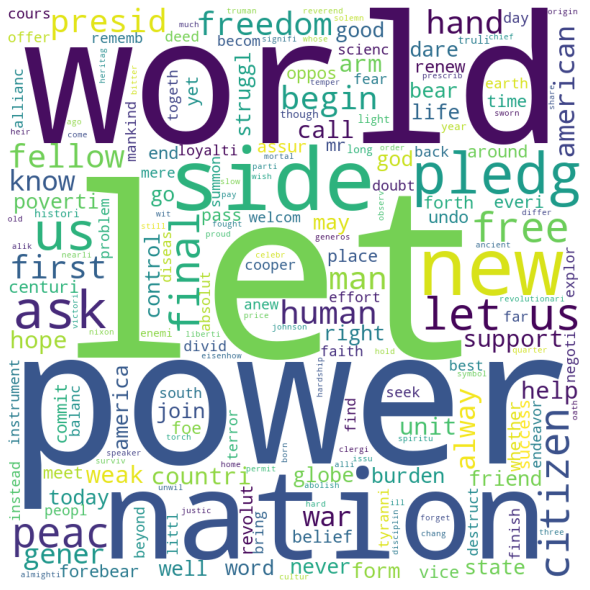

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

# Nixon Speech

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

review = re.sub('[^a-zA-Z]', ' ', nixon)
review = review.lower()
review = review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

corpus.append(review)

In [ ]:
from collections import Counter
my_counter = Counter()
for word in corpus:
    my_counter.update(word)
my_counter.most_common(3)

[('us', 26), ('let', 22), ('america', 21)]

In [ ]:
review = ' '.join(review)
review

'mr vice presid mr speaker mr chief justic senat cook mr eisenhow fellow citizen great good countri share togeth met four year ago america bleak spirit depress prospect seemingli endless war abroad destruct conflict home meet today stand threshold new era peac world central question us shall use peac let us resolv era enter postwar period often time retreat isol lead stagnat home invit new danger abroad let us resolv becom time great respons greatli born renew spirit promis america enter third centuri nation past year saw far reach result new polici peac continu revit tradit friendship mission peke moscow abl establish base new durabl pattern relationship among nation world america bold initi long rememb year greatest progress sinc end world war ii toward last peac world peac seek world flimsi peac mere interlud war peac endur gener come import understand necess limit america role maintain peac unless america work preserv peac peac unless america work preserv freedom freedom let us cle

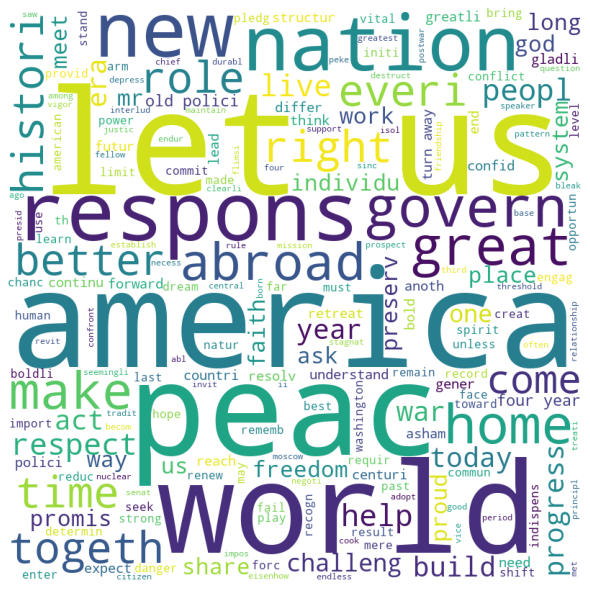

In [ ]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()